# Investigate behaviour of 1D system

In [16]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace
from matplotlib.animation import FuncAnimation
from scipy.signal import find_peaks, correlate
from IPython.display import HTML
from tqdm import tqdm
import pickle
import visualisation as vis
from delta_hes_model import *


## Functions

In [5]:
def test_Delta_coup(coefficient, coup_strength, lattice, params, num_tsteps, dt):
    print('Coefficient:', coefficient)
    print('Coupling strength:', coup_strength)

    params.n = coefficient
    params.w_coupling = coup_strength

    h, m_h, d, m_d = simulate(num_tsteps, dt, lattice, params, coupling_type= 'Delta', initial_type='checkerboard')

    return h, m_h, d, m_d

## Fixed parameters of the system

In [ ]:
# #set the lattice of the cells 
# P = 20
# Q = 1

# lattice = get_lattice(P, Q)

# # # set initial parameters of the reactions 
# gamma_h = 0.03
# gamma_d = 0.03
# gamma_m = 0.03
# p_h = 100
# p_d = 100
# T_h = 20
# T_coupling = 0
# w_h = 1
# w_coupling = 0.01
# l = 5
# n = 3

# params = get_params(gamma_h, gamma_d, gamma_m, p_h, p_d, T_h, T_coupling, w_h, w_coupling, l, n, lattice, grad_hes = True, grad_coup = False, grad_hes_strength = 0.2, grad_coup_strength = 0)

## Varying coupling strength and Hill coefficient 

In [ ]:
# coeff_1D = [1, 2, 3, 4, 5]
# coupling_strengths_1D = np.linspace(0, 0.4, int(0.4/0.05) + 1)
# print('Hill coefficients:', coeff_1D)
# print('Coupling strengths:', coupling_strengths_1D)

# results_1D = np.zeros([len(coeff_1D), len(coupling_strengths_1D), num_tsteps, lattice.P, lattice.Q, 4])
# #values for system with no Delta
# print('Calculating the no coupling system')
# h0, m_h0, d0, m_d0 = test_Delta_coup(coeff_1D[0], coupling_strengths_1D[i], lattice, num_tsteps, dt)

# for i in range(len(coeff_1D)):
#     for j in range(len(coupling_strengths_1D)):
#         if j == 0:
#             h, m_h, d, m_d = h0, m_h0, d0, m_d0
#         else:
#             h, m_h, d, m_d = test_Delta_coup(coeff_1D[i], coupling_strengths_1D[j], lattice, num_tsteps, dt)
        
#         # Save the results in the 5D array
#         results_1D[i,j,:,:,:,0] = h
#         results_1D[i,j,:,:,:,1] = m_h
#         results_1D[i,j,:,:,:,2] = d
#         results_1D[i,j,:,:,:,3] = m_d


# # save the results to a file\

# data_dict = {
#     'results_1D': results_1D,
#     'coeff_1D': coeff_1D,
#     'coupling_strengths_1D': coupling_strengths_1D, 
#     'num_tsteps': num_tsteps,	
#     'dt': dt,
#     'lattice': lattice,
#     'params': params,
# }

# with open("results_delta_15_04_1D.pkl", "wb") as file:
#     pickle.dump(data_dict, file)

Hill coefficients: [1, 2, 3, 4, 5]
Coupling strengths: [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4 ]


### Load in data from file

In [10]:
with open(r'C:\Users\kbmcd\OneDrive\Documenten\Studie\Master_Thesis\Result_files\results_delta_15_04_1D.pkl', 'rb') as f:
    data_1D = pickle.load(f)

In [12]:
results_1D = data_1D['results_1D']
coeff_1D = data_1D['coeff_1D']
coupling_strengths_1D = data_1D['coupling_strengths_1D']
num_tsteps = data_1D['num_tsteps']
dt = data_1D['dt']
lattice = data_1D['lattice']
params = data_1D['params']



### Plots

C:\Users\kbmcd\AppData\Local\Temp\ipykernel_24712\3572850055.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6,3), constrained_layout=True)


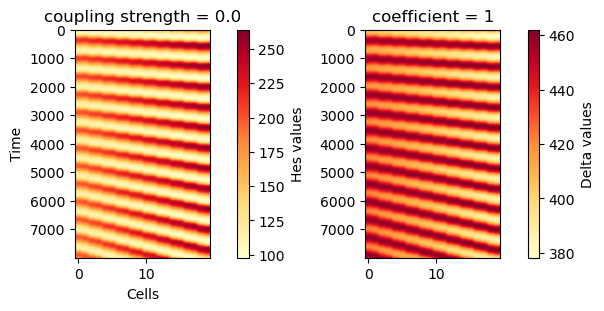

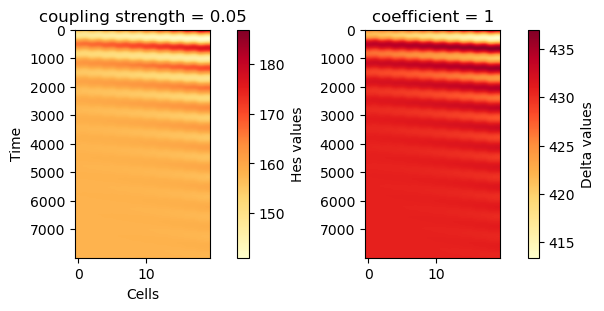

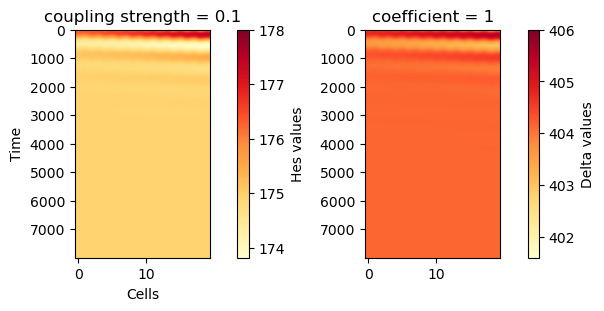

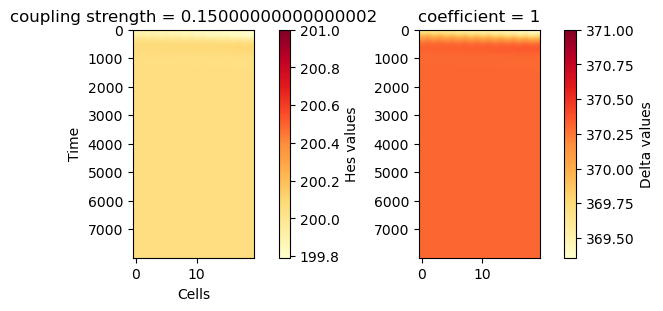

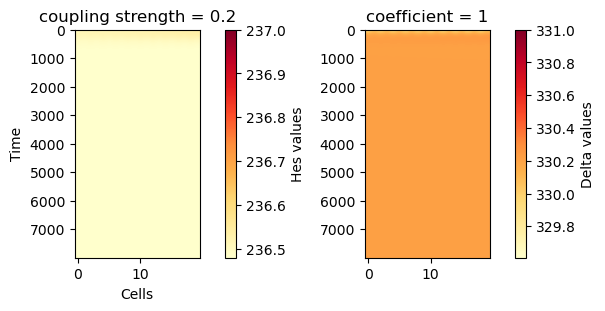

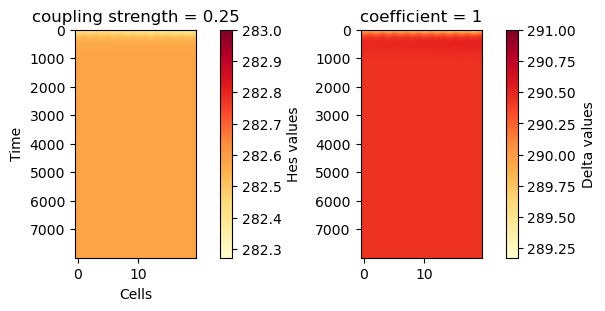

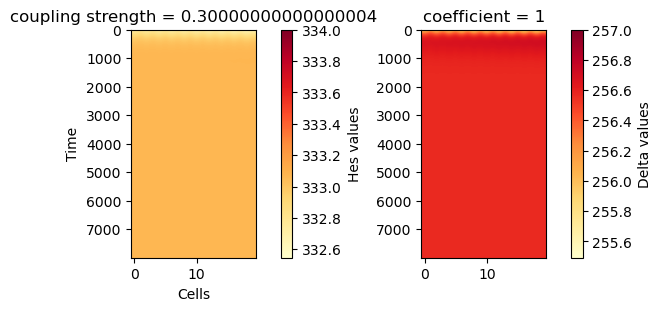

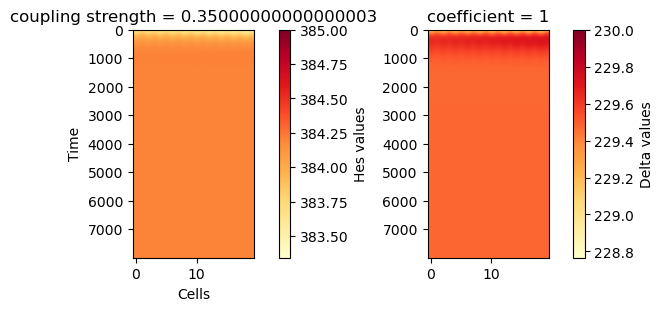

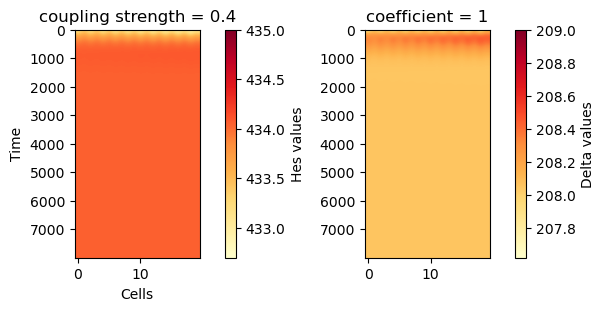

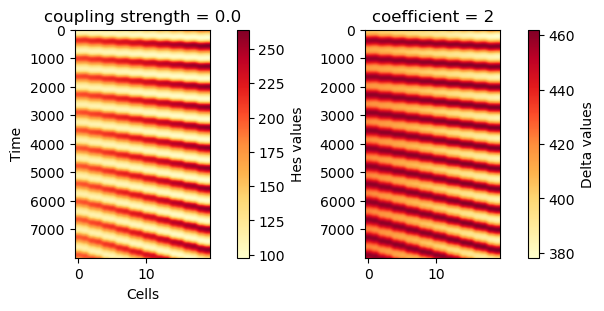

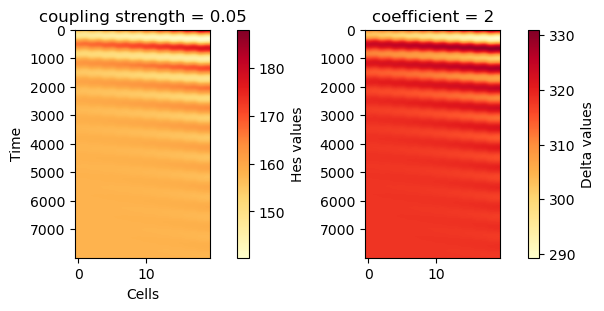

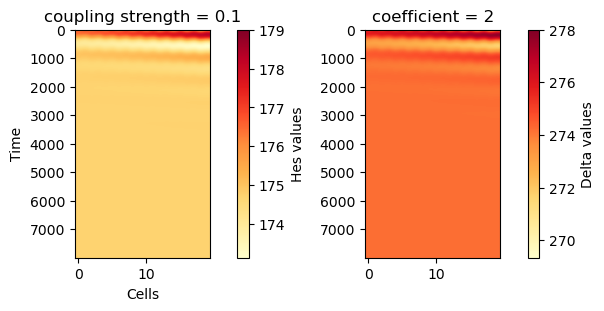

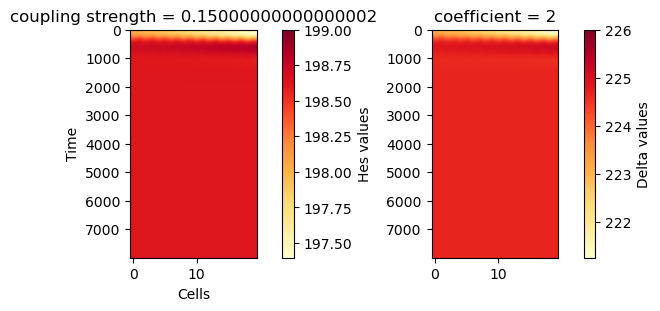

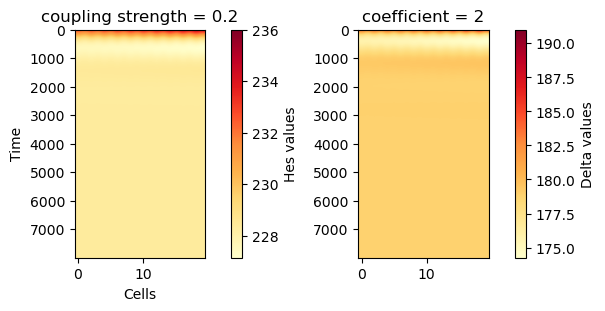

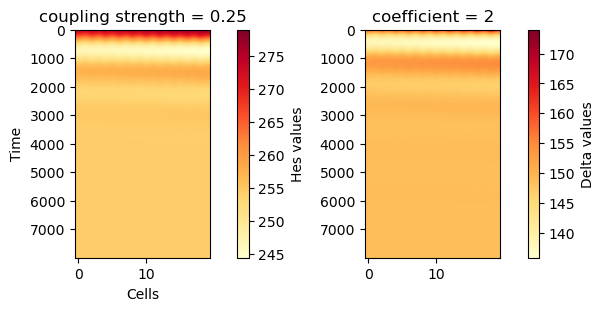

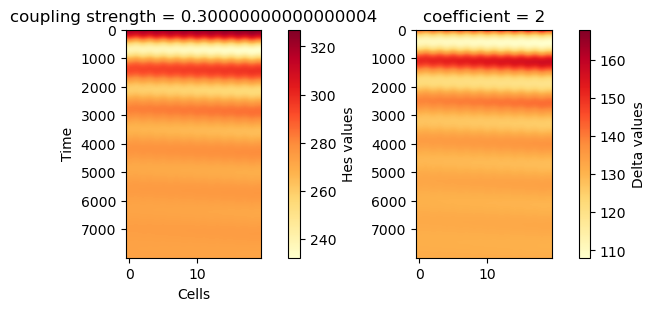

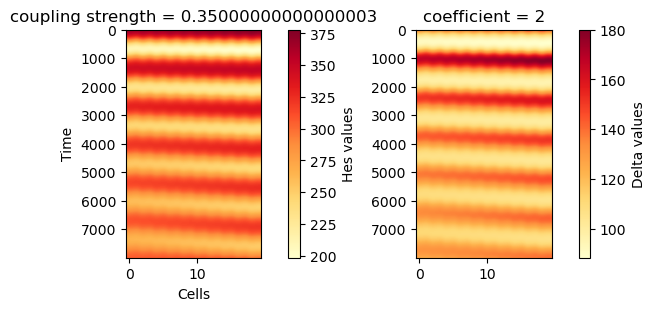

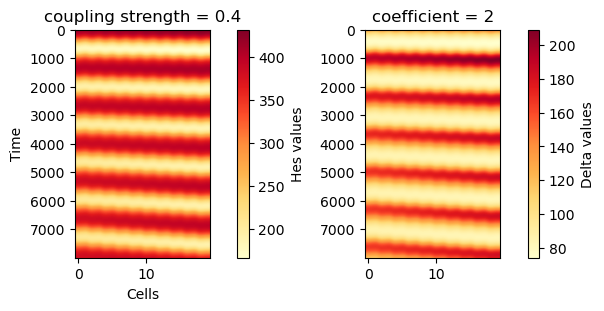

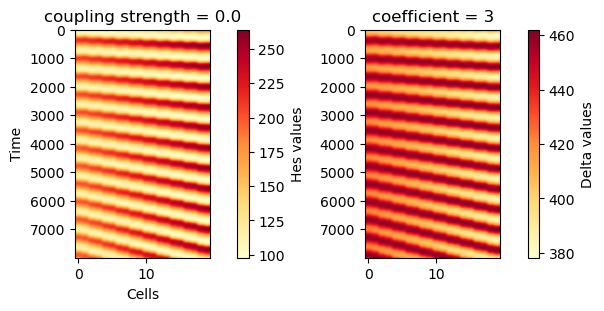

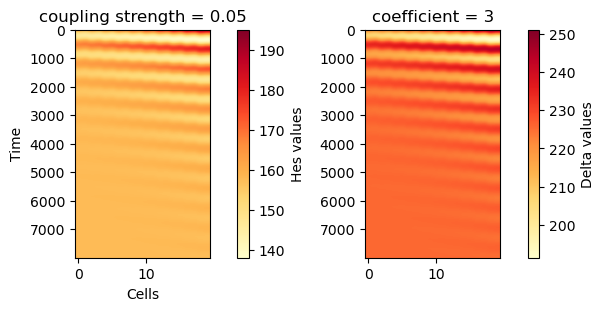

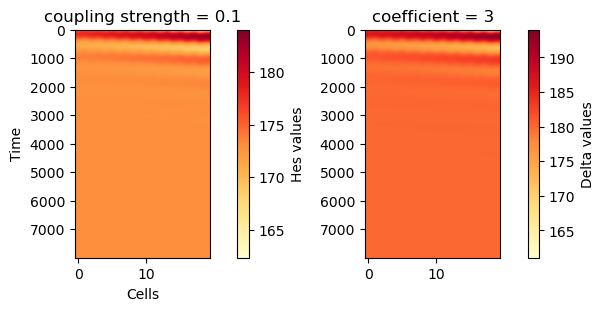

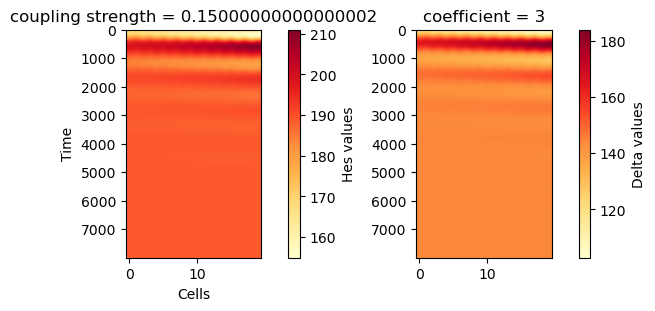

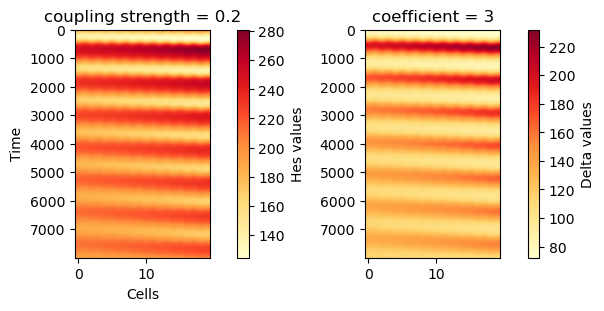

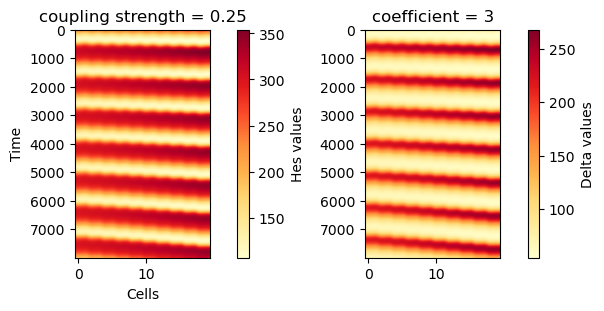

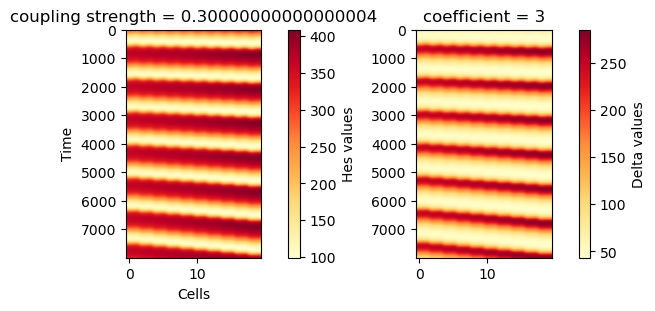

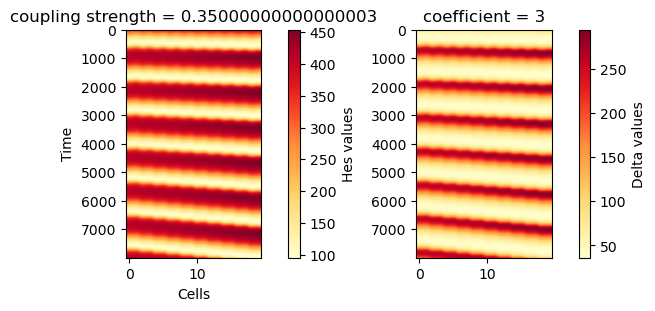

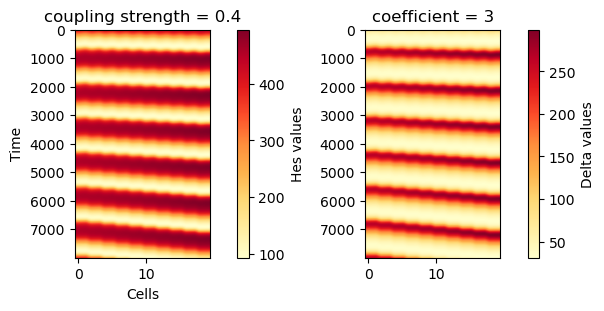

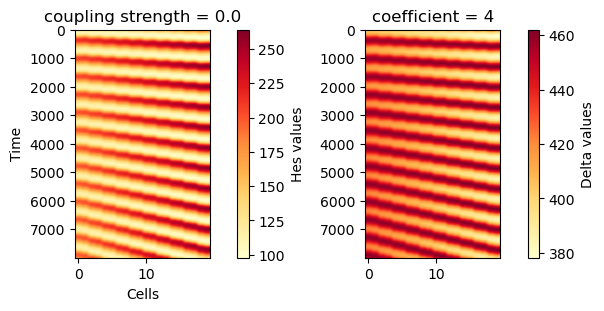

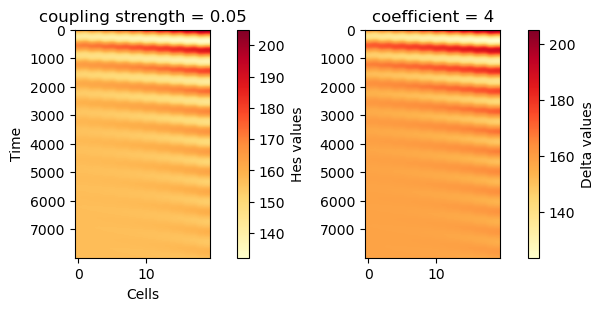

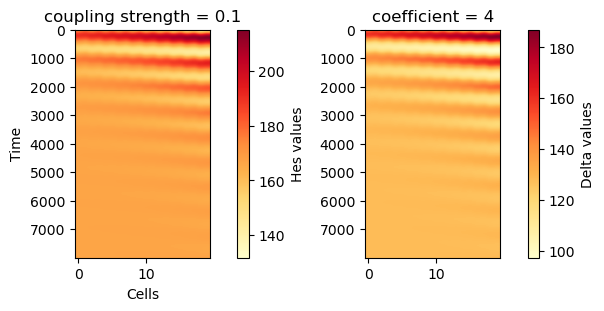

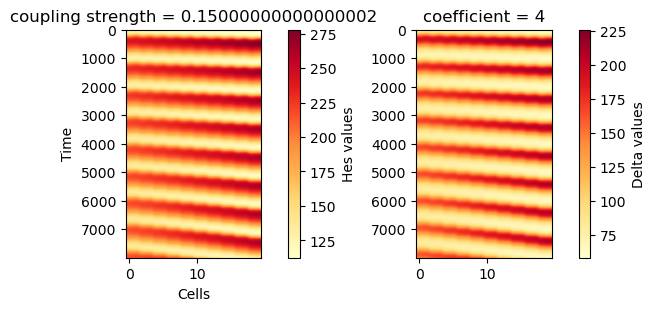

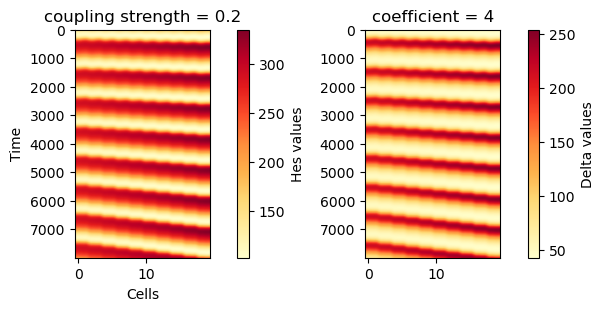

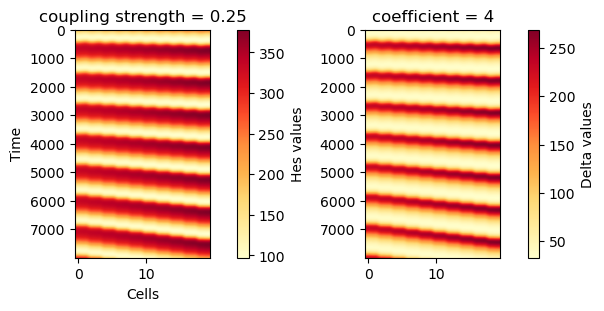

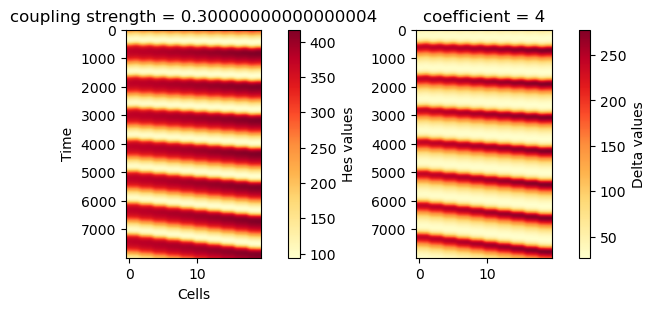

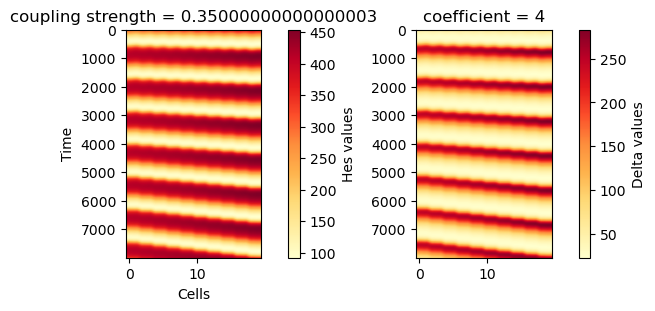

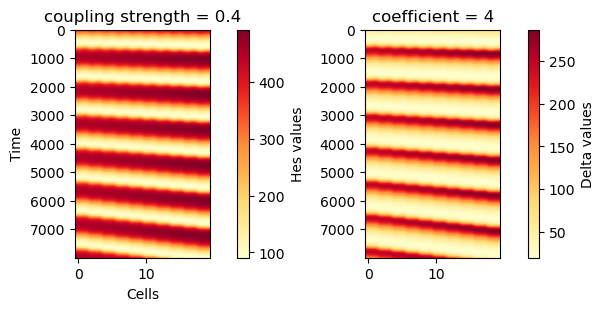

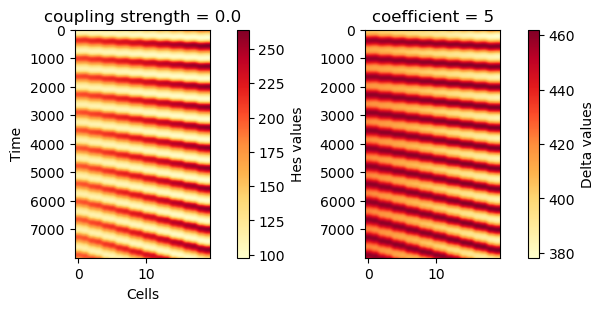

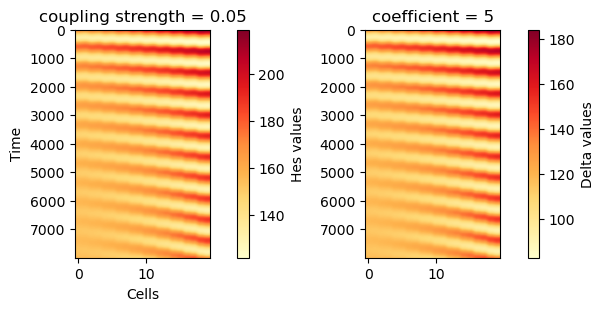

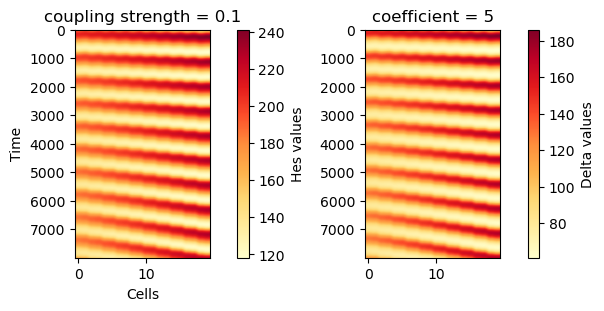

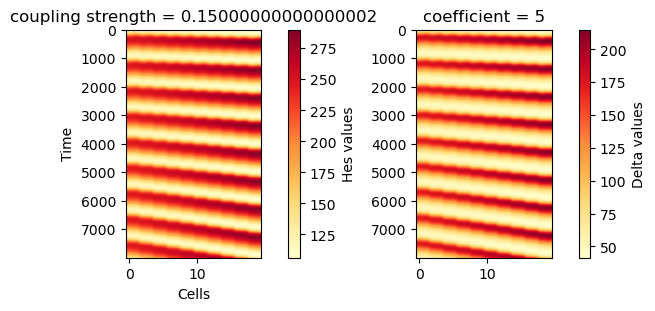

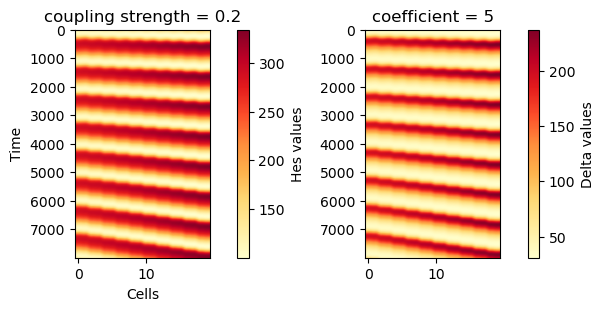

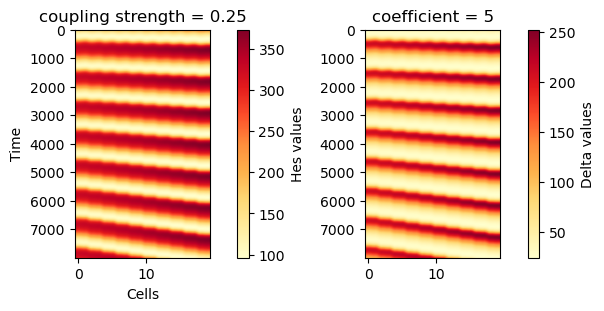

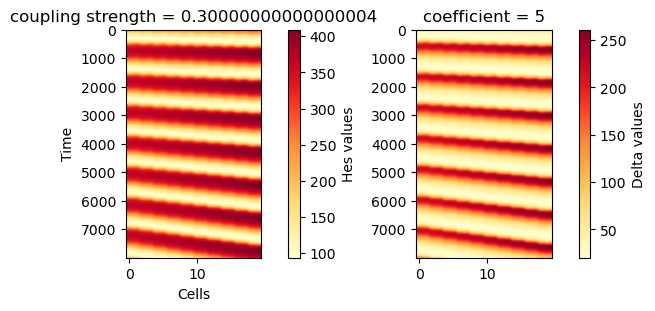

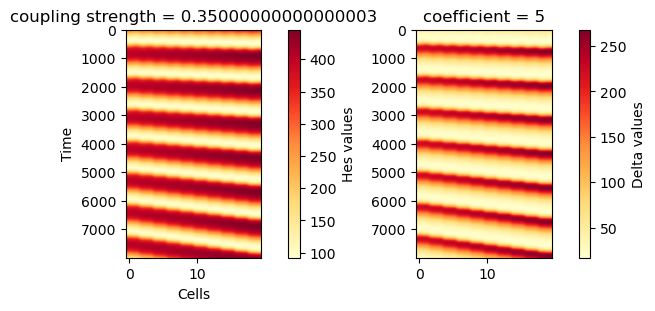

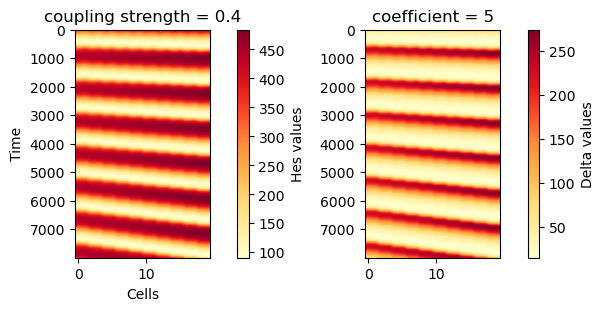

In [13]:
# Set up the figure and two axes for vertically stacked images
for i in range(len(coeff_1D)):
    for j in range(len(coupling_strengths_1D)):

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6,3), constrained_layout=True)
        h_flat = results_1D[i,j,2000:,:,0,0].reshape(num_tsteps-2000, lattice.P)
        d_flat = results_1D[i,j,2000:,:,0,2].reshape(num_tsteps-2000, lattice.P)

        # Plot the first image
        im1 = ax1.imshow(h_flat, aspect = 'auto',  cmap='YlOrRd', vmin = np.min(h_flat), vmax = np.ceil(np.max(h_flat)))
        ax1.set_ylabel('Time')
        ax1.set_xlabel('Cells')
        ax1.set_title('coupling strength = ' + str(coupling_strengths_1D[j]))

        # Add colorbar for the first image
        cbar1 = fig.colorbar(im1, ax=ax1, orientation='vertical', fraction=0.1, pad=0.2)
        cbar1.set_label('Hes values')

        # Plot the second image
        im2 = ax2.imshow(d_flat, aspect = 'auto',  cmap='YlOrRd', vmin = np.min(d_flat), vmax = np.ceil(np.max(d_flat)))
        ax2.set_title('coefficient = ' + str(coeff_1D[i]))

        # Add colorbar for the second image
        cbar2 = fig.colorbar(im2, ax=ax2, orientation='vertical', fraction=0.1, pad=0.2)
        cbar2.set_label('Delta values')

        #fig.savefig('1D_h_d_coeff_' + str(coeff_1D[i]) + '_coup_' + str(coupling_strengths_1D[j]) + '.png', dpi=300, bbox_inches='tight')

### Observable: period

In [14]:
def smoothen_signal(signal, window_size=5):
    """
    Smoothen a 1D signal using a moving average filter.

    Parameters:
    - signal: 1D numpy array of the signal values
    - window_size: Size of the moving window (default is 5)

    Returns:
    - smoothed_signal: Smoothed signal (1D numpy array)
    """
    if window_size < 1:
        raise ValueError("Window size must be at least 1.")
    
    # Create the moving average filter
    kernel = np.ones(window_size) / window_size
    smoothed_signal = np.convolve(signal, kernel, mode='same')

    return smoothed_signal

def estimate_period_from_peaks(signal, time=None, height=None, distance=None, prominence=None):
    """
    Estimate the period of an oscillating signal using peak detection.

    Parameters:
    - signal: 1D numpy array of the signal values
    - time: Optional 1D array of time values (same length as signal). If None, assume uniform time steps.
    - height, distance, prominence: Optional arguments passed to find_peaks for filtering.

    Returns:
    - period: Estimated average period (float)
    - peak_times: Time values of the detected peaks
    """
    # Find peaks
    peaks, _ = find_peaks(signal, height=height, distance=distance, prominence=prominence)
    if time is None:
        # Assume uniform spacing
        time = np.arange(len(signal))

    peak_times = time[peaks]

    if len(peak_times) < 4:
        period = -1000  # Not enough peaks to estimate period

    # Calculate differences between consecutive peaks
    peak_diffs = np.diff(peak_times)
    period = np.mean(peak_diffs)

    return period, peak_times

def estimate_period_fft(signal, time=None, detrend=False):
    """
    Estimate the dominant period of a signal using Fourier Transform.

    Parameters:
    - signal: 1D array of signal values
    - time: 1D array of time values (if None, assume uniform time steps)
    - detrend: Remove the mean before FFT to reduce DC offset

    Returns:
    - period: Estimated dominant period
    - freqs: Frequencies used
    - power: Power spectrum
    """
    if time is None:
        dt = 1.0  # assume uniform spacing of 1
        time = np.arange(len(signal))
    else:
        dt = np.mean(np.diff(time))  # average time step

    if detrend:
        signal = signal - np.mean(signal)  # remove DC component

    # Perform FFT
    fft_vals = np.fft.fft(signal)
    fft_freqs = np.fft.fftfreq(len(signal), d=dt)

    # Use only positive frequencies
    pos_mask = fft_freqs > 0
    freqs = fft_freqs[pos_mask]
    power = np.abs(fft_vals[pos_mask])**2

    # Find the peak frequency
    peak_idx = np.argmax(power)
    dominant_freq = freqs[peak_idx]
    period = 1 / dominant_freq

    return period, freqs, power

def estimate_period_autocorr(signal, time=None, detrend=False, height = None, min_period=1):
    """
    Estimate the dominant period of a signal using autocorrelation.

    Parameters:
    - signal: 1D array of the signal values
    - time: 1D array of time points (optional, required for real period values)
    - detrend: Whether to subtract the mean (removes DC offset)
    - min_period: Minimum time (or index) to consider between peaks

    Returns:
    - estimated_period: Dominant period (in time units if time is provided)
    - lags: Lag values
    - autocorr: Autocorrelation values
    """
    n = len(signal)

    if detrend:
        signal = signal - np.mean(signal)

    # Full autocorrelation, symmetric around center
    autocorr_full = correlate(signal, signal, mode='full')
    autocorr = autocorr_full[n-1:]  # second half only
    autocorr /= autocorr[0]  # normalize

    lags = np.arange(len(autocorr))

    # Find peaks in autocorrelation
    peaks, _ = find_peaks(autocorr, distance=min_period, height=height)

    if len(peaks) < 1:
        return None, lags, autocorr  # No peaks found

    dominant_lag = peaks[0]

    if time is not None:
        dt = np.mean(np.diff(time))
        estimated_period = dominant_lag * dt
    else:
        estimated_period = dominant_lag  # in sample units

    return estimated_period, lags, autocorr

In [17]:
# find periods for the 1D system, per cell 
periods_peaks = np.zeros([len(coeff_1D), len(coupling_strengths_1D), lattice.P])
periods_fft = np.zeros([len(coeff_1D), len(coupling_strengths_1D), lattice.P])
periods_autocorr = np.zeros([len(coeff_1D), len(coupling_strengths_1D), lattice.P])

for i in range(len(coeff_1D)):
    for j in range(len(coupling_strengths_1D)):
        for p in range(lattice.P):
            # analyse second half of signal 
            time_analysis = int(num_tsteps/2)
            signal = results_1D[i,j,time_analysis:,p,0,0].flatten()
            signal_max = np.max(signal)
            signal_min = np.min(signal)
            amplitude_threshold = 20

            # find the period of the oscillation for each cell
            periods_peaks[i,j,p]= estimate_period_from_peaks(signal, time = np.arange(int(num_tsteps/2))*dt, height=amplitude_threshold)[0]
            periods_fft[i,j,p] = estimate_period_fft(signal, time = np.arange(int(num_tsteps/2))*dt)[0]
            periods_autocorr[i,j,p] = estimate_period_autocorr(signal, time = np.arange(int(num_tsteps/2))*dt, height=None)[0]

c:\Programs\Anaconda3\envs\MEPenv\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Programs\Anaconda3\envs\MEPenv\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


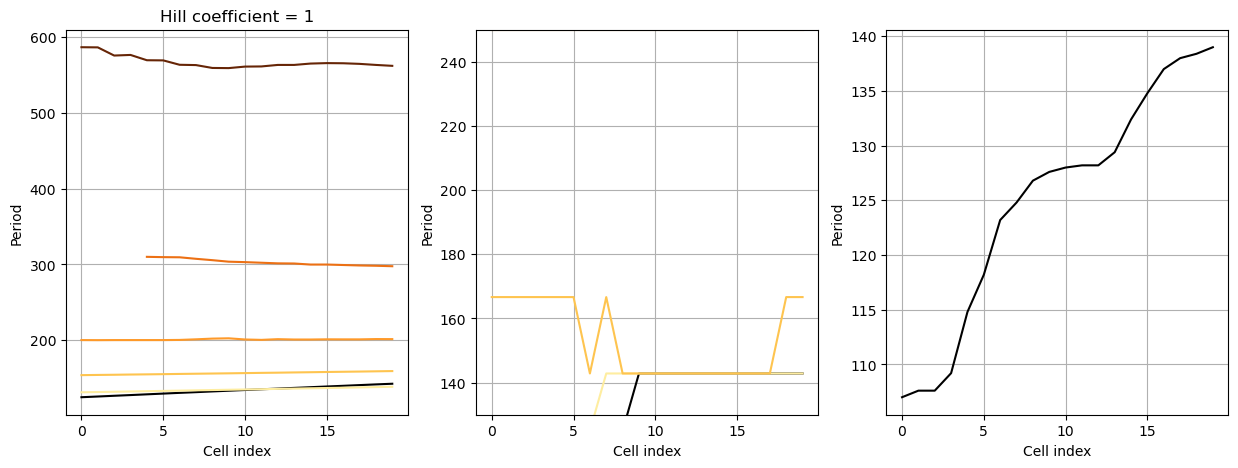

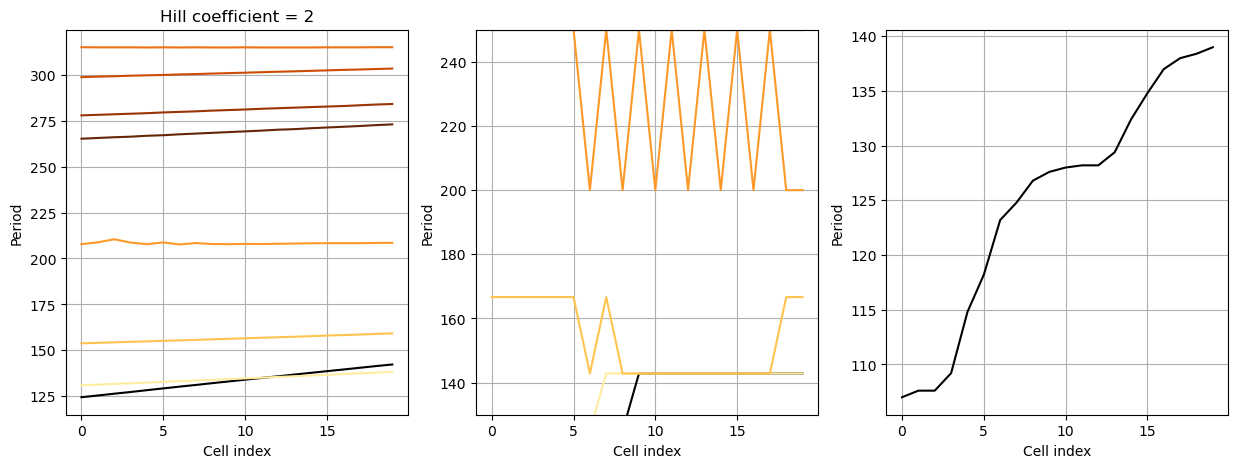

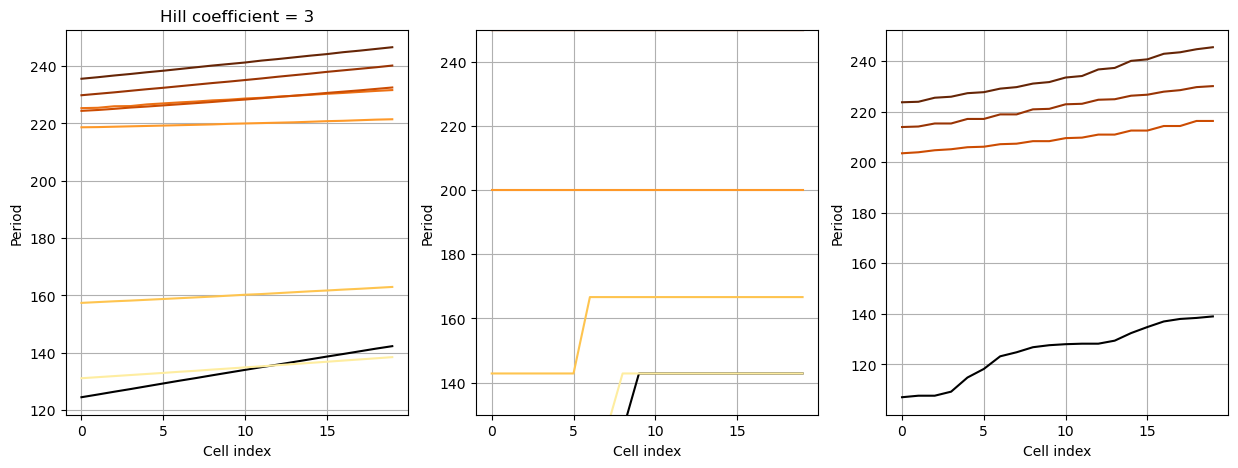

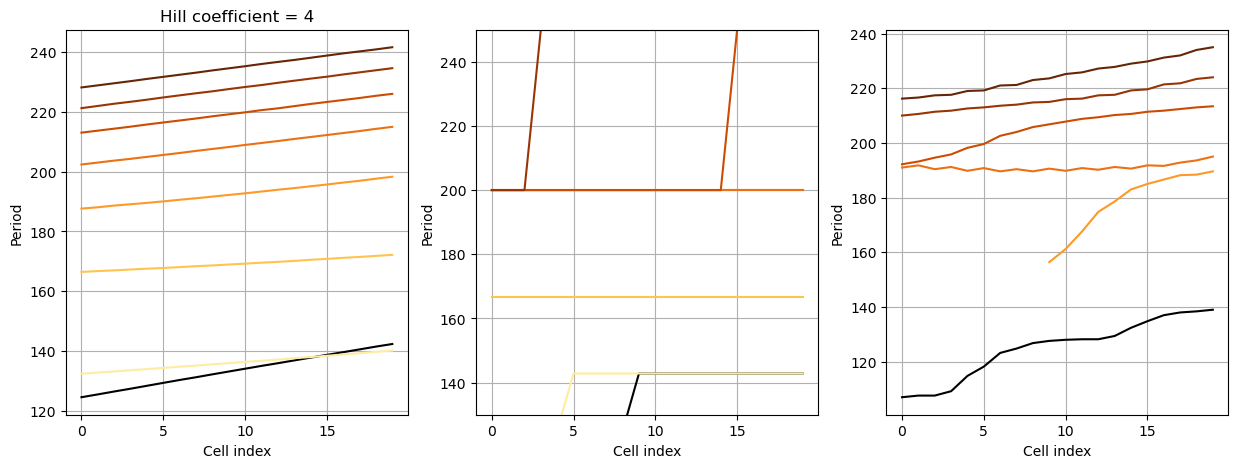

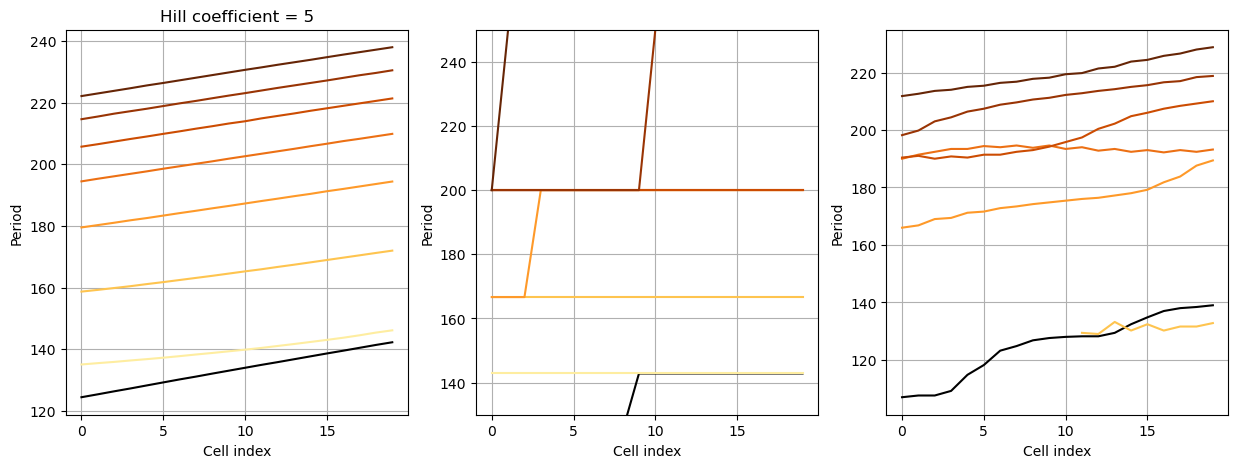

In [18]:
colors_coeffs = ['#ffffb2', '#fecc5c', '#fd8d3c', '#f03b20', '#bd0026']
colors_strengths = ['#feeda0', '#fec44f', '#fe9929', '#ec7014', '#cc4c02', '#993404', '#662506']


for i in range(len(coeff_1D)):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 3, 1)
    plt.plot(np.arange(lattice.P), periods_peaks[0,0,:], label = 'no coupling periods', color = 'black')
    plt.xlabel('Cell index')
    plt.ylabel('Period')
    plt.grid()
    
    for j in range(1, len(coupling_strengths_1D)-1):
        plt.plot(np.arange(lattice.P), periods_peaks[i,j,:], color = colors_strengths[j-1], label = f'coeff = {coeff_1D[i]}, coup_strength = {coupling_strengths_1D[j]}')
    plt.title(f'Hill coefficient = {coeff_1D[i]}')


    plt.subplot(1,3,2)
    plt.plot(np.arange(lattice.P), periods_fft[0,0,:], label = 'no coupling periods', color = 'black')
    for j in range(1, len(coupling_strengths_1D)-1):
        plt.plot(np.arange(lattice.P), periods_fft[i,j,:], color = colors_strengths[j-1], label = f'coeff = {coeff_1D[i]}, coup_strength = {coupling_strengths_1D[j]}')
    plt.ylim(130,250)
    plt.xlabel('Cell index')
    plt.ylabel('Period')
    plt.grid()

    plt.subplot(1,3,3)
    plt.plot(np.arange(lattice.P), periods_autocorr[0,0,:], label = 'no coupling periods', color = 'black')
    for j in range(1, len(coupling_strengths_1D)-1):
        plt.plot(np.arange(lattice.P), periods_autocorr[i,j,:], color = colors_strengths[j-1], label = f'coeff = {coeff_1D[i]}, coup_strength = {coupling_strengths_1D[j]}')

    plt.xlabel('Cell index')
    plt.ylabel('Period')
    plt.grid()

## Phase space 

In [19]:
for i in range(lattice.P):
    plt.figure()
    for j in range(lattice.Q):
        q_test = j
        plt.plot(m_h[:,i,q_test], m_d[:,i,q_test],  label = 'for P = ' + str(i))
    plt.xlabel('m_h')
    plt.ylabel('m_d')
    plt.legend()
    plt.show()

NameError: name 'm_h' is not defined

<Figure size 640x480 with 0 Axes>